Sentimantal analysis

In [1]:
# 1. Import Libraries and Check Data 

In [2]:
# Basic Libraries 
# --------------------------------------
import numpy as np
import pandas as pd


# Plot library 
# --------------------------------------
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio


# NLP
# --------------------------------------
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud  # visualization of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Metrics 
# --------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder


# Machine Learning Models 
# --------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#------------------------Embedding
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
#from keras.layers.convolutional import Conv1D
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import GlobalMaxPooling1D
from keras.layers import Activation, Dropout, Dense
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import bz2
import re

# Customize to Remove Warnings and Better Observation 
# --------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# # Web scraping for amazon product reviews collection
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# from urllib.parse import urlencode
# import csv

# # Define URLs
# list_of_urls = ['https://www.amazon.com/OnePlus-Unlocked-Smartphone-Hasselblad-Wireless/product-reviews/B07XM7WVS8/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1']

# for i in range(3, 5):
#     list_of_urls.append(list_of_urls[0].replace('1', str(i)))

# # Retrieve each URL's HTML data and convert it into a BeautifulSoup object.
# # Find, extract, and store reviewer names and review text into lists.

# scores = []
# titles = []
# reviews = []

# for url in list_of_urls:
#     params = {'api_key': "YOUR_SCRAPER_API_KEY", 'url': url}  # Replace YOUR_SCRAPER_API_KEY with your actual Scraper API key
#     response = requests.get('http://api.scraperapi.com/', params=urlencode(params))
#     soup = BeautifulSoup(response.text, 'html.parser')

#     for item in soup.find_all('i', {'data-hook': 'review-star-rating'}):
#         score = item.text.replace('out of 5 stars', '').strip()
#         scores.append(scores)
    
#     for item in soup.find_all("span", {"data-hook": "review-title"}):
#         review = item.get_text().strip()
#         reviews.append(titles)

#     for item in soup.find_all("span", {"data-hook": "review-body"}):
#         review = item.get_text().strip()
#         reviews.append(reviews)

# # Create the dictionary.
# reviews_dict = {'rating': scores, 'title': titles, 'content': reviews}

# df = pd.DataFrame.from_dict(reviews_dict)
# df.to_csv('product_reviews.csv', index=False)
# print('Saved as product_review.csv')

In [4]:
df = pd.read_csv("C:\Python\Data\product_reviews.csv")
df.head()

,rating,title,content
0,4,Good phone but expensive,I got this after using multiple Samsung and Go...
1,5,Stellar phone! DOES NOT WORK ON SPRINT!,"This is a fabulous phone, and why it gets 5 st..."
2,3,Not what I was hoping for but it's ok.,As a long time fan of the OnePlus brand and ow...
3,3,Not what I ordered,I ordered this phone expecting it to be the LE...
4,2,"I chose this phone because it has a physical ""...",I am frequently in places where I don't want t...


In [5]:
df.isnull().count()

rating     100
title      100
content    100
dtype: int64

In [6]:
# drop missing values
df.dropna(subset=['content'], inplace=True)
df.isnull().count()

rating     100
title      100
content    100
dtype: int64

In [7]:
df.rating.value_counts()

rating
1    34
5    32
3    19
2     8
4     7
Name: count, dtype: int64

Bar Plot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

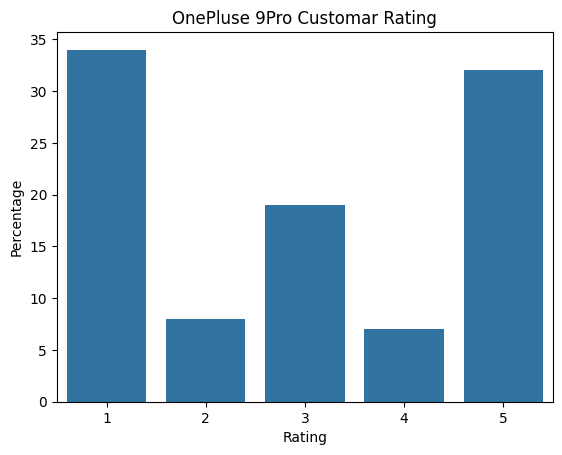

In [9]:
bar=sns.countplot(x='rating', data=df)
bar.set(xlabel='Rating', ylabel='Percentage', title='OnePluse 9Pro Customar Rating')
plt.show()

In [10]:
df.dropna(subset=['content'], inplace=True)
df.isnull().count()

rating     100
title      100
content    100
dtype: int64

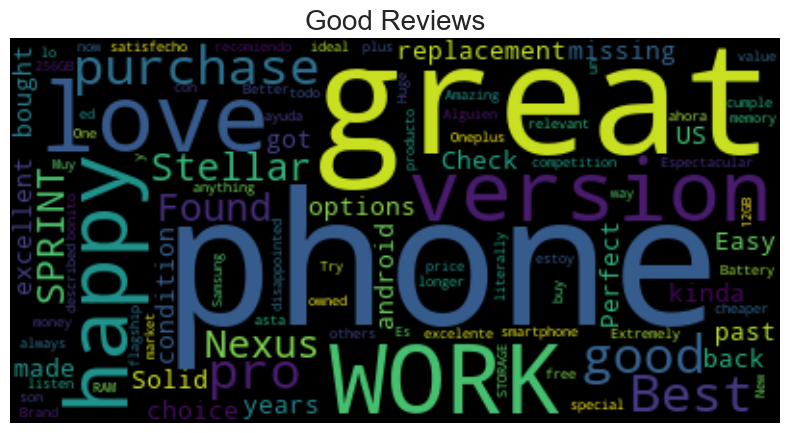

In [11]:
np.random.seed(88)
sns.set(rc={'figure.figsize':(10,5)})
reviews = ' '.join(df[df['rating']==5]['title'].tolist())

wordcloud = WordCloud(background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Good Reviews',size=20)
plt.show()

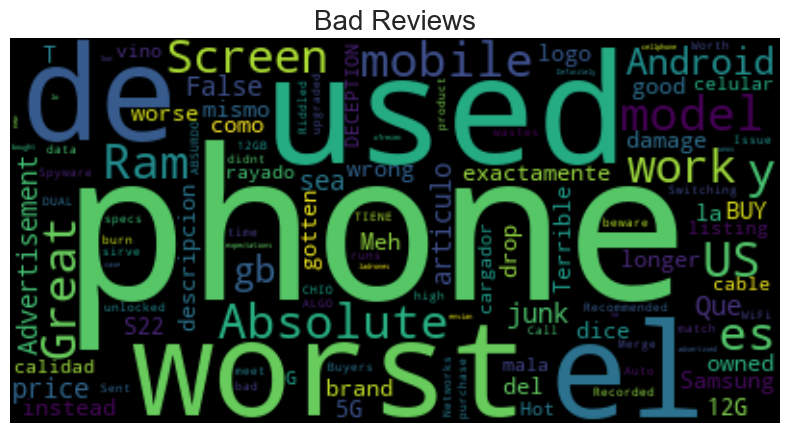

In [12]:
np.random.seed(88)
sns.set(rc={'figure.figsize':(10,5)})
reviews = ' '.join(df[df['rating']==1]['title'].tolist())

wordcloud = WordCloud(background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Bad Reviews',size=20)
plt.show()

# 2. Text Preprocessing 

In [13]:
# to put all the characters in a standard
df['content'] = df['content'].str.lower()  # make all lowercase

In [14]:
# Numbers
# check sentences and replace punctions with spaces
df['content'] = df['content'].str.replace('[^\w\s]', '')

In [15]:
df['content'] = df['content'].str.replace('\d', '')  

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\202724\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# save the downloaded stopwords
sw = stopwords.words('english')

In [18]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [19]:
# to find how many times words counts
temp_df = pd.Series(' '.join(df['content']).split()).value_counts()
temp_df

phone               106
oneplus              49
one                  27
9                    26
good                 26
                   ... 
box.<br>upgraded      1
sprint's              1
seen.                 1
activation            1
handset.              1
Name: count, Length: 2150, dtype: int64

In [20]:
# choose the words with less than 2 frequencies to drop
drops = temp_df[temp_df <= 1]

In [21]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [22]:
# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\202724\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\202724\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [24]:
# extract the term frequencies(frequency of the words) and create a df
tf = df["content"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.head()

,index,0
0,phone,123.00
1,good,26.00
2,samsung,17.00
3,oneplus,49.00
4,better,16.00


In [25]:
# fix the column names
tf.columns = ["words", "tf"]  

In [26]:
# to see the most frequent words
tf.sort_values("tf", ascending=False)

,words,tf
0,phone,123.00
3,oneplus,49.00
26,work,27.00
67,one,27.00
105,9,26.00
...,...,...
359,lost,2.00
358,option,2.00
355,thin,2.00
354,choice,2.00


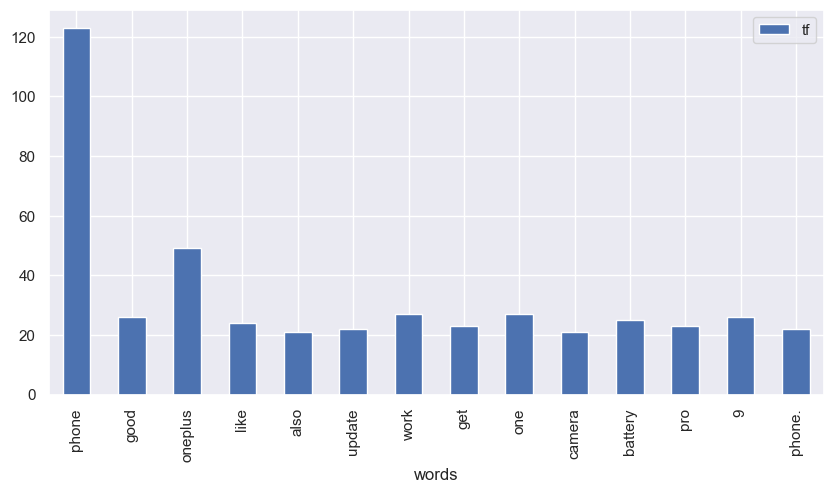

In [27]:
tf[tf["tf"] > 20].plot.bar(x="words", y="tf")
plt.show()

In [28]:
# Word Cloud
# check every row and join with these with a space
text = " ".join(i for i in df.content) 

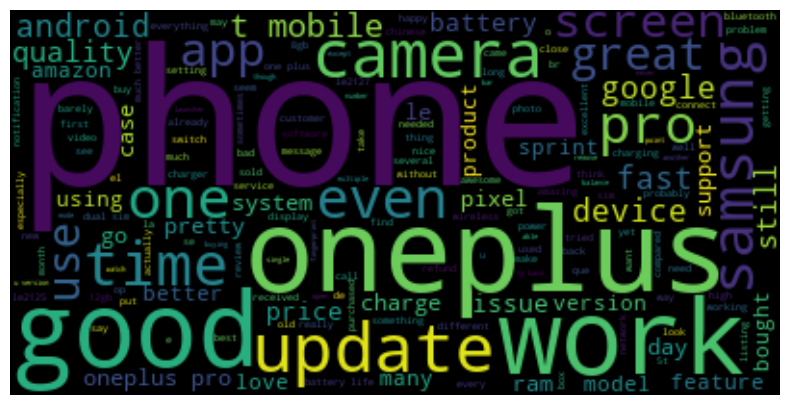

In [29]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

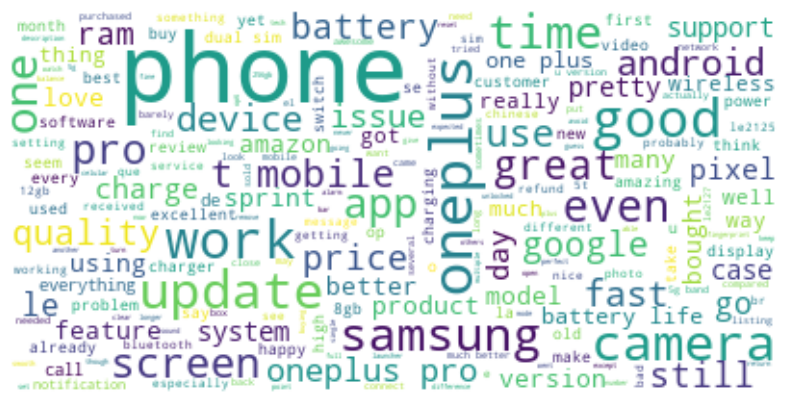

In [30]:
# configure the graph
wordcloud = WordCloud(max_font_size=50,
                      max_words=200,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
#Sentiment Analysis
df["content"].head()

0    got using multiple samsung google phones, issu...
1    phone, get 5 great. fingerprint face great. su...
2    long time fan oneplus brand op 1, 7 pro 9 pro,...
3    ordered phone expecting le2125 description. re...
4    place want phone switch side phone buy phone. ...
Name: content, dtype: object

In [32]:
nltk.download('vader_lexicon')  # pre-trained model for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\202724\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
# Implementation to our dataset
sia = SentimentIntensityAnalyzer()
df["content"][0:10].apply(lambda x: sia.polarity_scores(x)) 

0    {'neg': 0.027, 'neu': 0.673, 'pos': 0.3, 'comp...
1    {'neg': 0.015, 'neu': 0.757, 'pos': 0.228, 'co...
2    {'neg': 0.024, 'neu': 0.726, 'pos': 0.25, 'com...
3    {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...
4    {'neg': 0.129, 'neu': 0.781, 'pos': 0.09, 'com...
5    {'neg': 0.1, 'neu': 0.727, 'pos': 0.173, 'comp...
6    {'neg': 0.03, 'neu': 0.678, 'pos': 0.292, 'com...
7    {'neg': 0.055, 'neu': 0.73, 'pos': 0.215, 'com...
8    {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...
9    {'neg': 0.301, 'neu': 0.602, 'pos': 0.097, 'co...
Name: content, dtype: object

In [34]:
# take only compound scores
df["content"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"]) 

0    1.00
1    0.99
2    0.98
3    0.82
4   -0.44
5    0.89
6    0.96
7    0.89
8    0.81
9   -0.66
Name: content, dtype: float64

In [35]:
# save the scores as a new column
df["polarity_score"] = df["content"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [36]:
# we have such values and we will create a new variable by taking all of them so that we have a label.
df["content"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    pos
4    neg
5    pos
6    pos
7    pos
8    pos
9    neg
Name: content, dtype: object

In [37]:
# if we want to see this example with new label and pos/neg side by side
rev_pol = pd.concat([df["content"][0:10], df["content"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")], axis=1)
rev_pol.columns = ["Content", "Polarity Scores"]
rev_pol

,Content,Polarity Scores
0,"got using multiple samsung google phones, issu...",pos
1,"phone, get 5 great. fingerprint face great. su...",pos
2,"long time fan oneplus brand op 1, 7 pro 9 pro,...",pos
3,ordered phone expecting le2125 description. re...,pos
4,place want phone switch side phone buy phone. ...,neg
5,ever love something see manufacturer it. googl...,pos
6,buy third party looking go bought phone (i thi...,pos
7,"build quality premium weight it, still le say ...",pos
8,several battery life barely get charge insanel...,pos
9,bad! already problem first day turn device. ba...,neg


In [38]:
df["sentiment_label"] = df["content"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()

sentiment_label
pos    60
neg    40
Name: count, dtype: int64

In [39]:
df.groupby("sentiment_label")["rating"].mean()

sentiment_label
neg   2.20
pos   3.45
Name: rating, dtype: float64

In [40]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [41]:
y = df["sentiment_label"]
X = df["content"]

In [42]:
print(" X ".center(50, "~"))
display(X.head())
print("")
print(" Y ".center(50, "~"))
display(y.head())

~~~~~~~~~~~~~~~~~~~~~~~ X ~~~~~~~~~~~~~~~~~~~~~~~~


0    got using multiple samsung google phones, issu...
1    phone, get 5 great. fingerprint face great. su...
2    long time fan oneplus brand op 1, 7 pro 9 pro,...
3    ordered phone expecting le2125 description. re...
4    place want phone switch side phone buy phone. ...
Name: content, dtype: object


~~~~~~~~~~~~~~~~~~~~~~~ Y ~~~~~~~~~~~~~~~~~~~~~~~~


0    1
1    1
2    1
3    1
4    0
Name: sentiment_label, dtype: int32

In [43]:
# Count Vectors
nltk.download('punkt')
a = """ngram is a contiguous sequence of n items from a given sample of text or speech."""

TextBlob(a).ngrams(3)  # For example, let's create a triple ngram

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\202724\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[WordList(['ngram', 'is', 'a']),
 WordList(['is', 'a', 'contiguous']),
 WordList(['a', 'contiguous', 'sequence']),
 WordList(['contiguous', 'sequence', 'of']),
 WordList(['sequence', 'of', 'n']),
 WordList(['of', 'n', 'items']),
 WordList(['n', 'items', 'from']),
 WordList(['items', 'from', 'a']),
 WordList(['from', 'a', 'given']),
 WordList(['a', 'given', 'sample']),
 WordList(['given', 'sample', 'of']),
 WordList(['sample', 'of', 'text']),
 WordList(['of', 'text', 'or']),
 WordList(['text', 'or', 'speech'])]

In [44]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']


In [45]:
# word frequency
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus
X_c = vectorizer.fit_transform(corpus)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print feature names
print(feature_names)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [46]:
# n-gram
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2)) # Initialize CountVectorizer for bigrams
X_n = vectorizer2.fit_transform(corpus) # Fit and transform the corpus
feature_names = vectorizer2.get_feature_names_out() # Get the feature names for bigrams
print(feature_names) 
# Print feature names for bigrams

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']


In [47]:
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [48]:
#Application on our dataset
vectorizer = CountVectorizer()  # default => word count
X_count = vectorizer.fit_transform(X)  # X stands for texts, we only count the frequencies of the words
print(X_count)

  (0, 215)	1
  (0, 506)	2
  (0, 307)	1
  (0, 409)	12
  (0, 214)	7
  (0, 351)	5
  (0, 248)	1
  (0, 480)	2
  (0, 213)	13
  (0, 343)	2
  (0, 72)	4
  (0, 76)	1
  (0, 378)	5
  (0, 350)	16
  (0, 182)	2
  (0, 216)	2
  (0, 218)	1
  (0, 524)	1
  (0, 249)	5
  (0, 496)	1
  (0, 268)	6
  (0, 356)	8
  (0, 102)	1
  (0, 31)	5
  (0, 521)	1
  :	:
  (99, 197)	1
  (99, 62)	1
  (99, 154)	1
  (99, 169)	1
  (99, 251)	1
  (99, 192)	1
  (99, 395)	1
  (99, 110)	1
  (99, 322)	5
  (99, 319)	1
  (99, 293)	1
  (99, 12)	1
  (99, 194)	1
  (99, 329)	1
  (99, 354)	1
  (99, 297)	1
  (99, 10)	6
  (99, 223)	2
  (99, 229)	2
  (99, 457)	2
  (99, 391)	2
  (99, 507)	3
  (99, 325)	2
  (99, 224)	2
  (99, 353)	2


In [49]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Extract a subset of feature names (e.g., from index 10 to 14)
subset_feature_names = feature_names[10:15]

# Print the subset of feature names
print(subset_feature_names)

['5t' '6t' '7t' '8gb' 'ability']


In [50]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
# word frequency
tf_idf_word_vectorizer = TfidfVectorizer()  # default = word frequency
corpus_tf_idf_word = tf_idf_word_vectorizer.fit_transform(corpus)
tf_idf_word_vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [52]:
corpus_tf_idf_word.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [53]:
# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
corpus_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)
tf_idf_ngram_vectorizer.get_feature_names_out()

array(['10 5g', '10 5g bands', '10 pro', ..., 'zero oneplus tech',
       'zero warning', 'zero warning update'], dtype=object)

In [54]:
corpus_tf_idf_ngram.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11738296, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
# Application on our dataset
# word
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [56]:
# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

## Modeling

In [69]:
# Sentimantal Modeling: Logistic Regression

# Count Vectors
log_model_1 = LogisticRegression().fit(X_count, y)
print("LogReg-Count Vectors Score", cross_val_score(log_model_1, X_count, y, scoring="accuracy",cv=5, n_jobs=-1).mean())

# TF-IDF Word-Level
log_model_2 = LogisticRegression().fit(X_tf_idf_word, y)
print("LogReg-IDF Word Score", cross_val_score(log_model_2, X_tf_idf_word, y, scoring="accuracy", cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
log_model_3 = LogisticRegression().fit(X_tf_idf_ngram, y)
print("LogReg-IDF N-Gram Score", cross_val_score(log_model_3, X_tf_idf_ngram, y, scoring="accuracy", cv=5, n_jobs=-1).mean())

LogReg-Count Vectors Score 0.78
LogReg-IDF Word Score 0.7
LogReg-IDF N-Gram Score 0.6


In [70]:
# get a new comment
new_review = pd.Series("this product is great phone as OnePlus 9pro")
# vectorize the new review
new_review = TfidfVectorizer().fit(X).transform(new_review)

# predict the sentiment of review
log_model.predict(new_review)


array([1])

In [80]:
# Sentimantal Modeling: Naive Bayes
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
# Count Vectors
NB_model1 = MultinomialNB().fit(X_count, y)
print("NB-Count Vectors Score", cross_val_score(NB_classifier, X_count, y, scoring="accuracy",cv=5, n_jobs=-1).mean())

# TF-IDF Word-Level
NB_model2 = MultinomialNB().fit(X_tf_idf_word, y)
print("NB-IDF Word Score", cross_val_score(NB_classifier, X_tf_idf_word, y, scoring="accuracy", cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
NB_model3 = MultinomialNB().fit(X_tf_idf_ngram, y)
print("NB-IDF N-Gram Score", cross_val_score(NB_classifier, X_tf_idf_ngram, y, scoring="accuracy", cv=5, n_jobs=-1).mean())

NB-Count Vectors Score 0.7
NB-IDF Word Score 0.73
NB-IDF N-Gram Score 0.53


In [66]:
# Random Forest
# Count Vectors
rf_model1 = RandomForestClassifier().fit(X_count, y)
print("Count Vectors Score", cross_val_score(rf_model1, X_count, y, cv=5, n_jobs=-1).mean()) 

# TF-IDF Word-Level
rf_model2 = RandomForestClassifier().fit(X_tf_idf_word, y)
print("TF-IDF Word-Level Score", cross_val_score(rf_model2, X_tf_idf_word, y, cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
rf_model3 = RandomForestClassifier().fit(X_tf_idf_ngram, y)
print("TF-IDF N-Gram Score", cross_val_score(rf_model3, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean())

Count Vectors Score 0.8099999999999999
TF-IDF Word-Level Score 0.76
TF-IDF N-Gram Score 0.43


> **Let's plot these scores.**

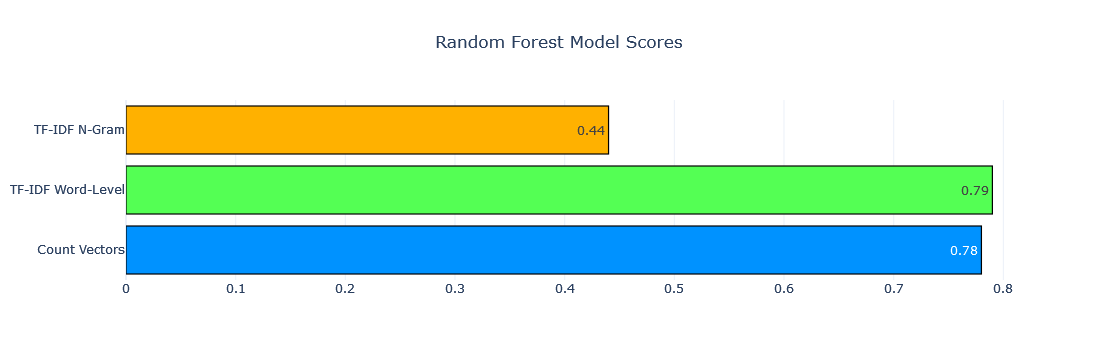

CPU times: total: 750 ms
Wall time: 2.75 s


In [68]:
%%time
def score(method_list):
    scores = []
    for method in method_list:
        rf_model = RandomForestClassifier().fit(method, y)
        scores.append(cross_val_score(rf_model, method, y, cv=5, n_jobs=-1).mean())
        
    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})
    
    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#0092FF','#54FF54','#FFB100'],
                                 line=dict(color='rgb(0,0,0)',width=1.2)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group", 
                       title={'text': "Random Forest Model Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)
    
method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)

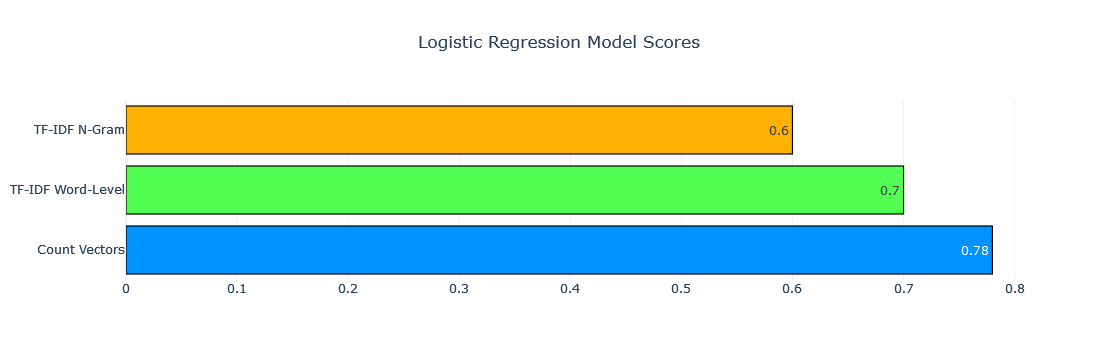

CPU times: total: 0 ns
Wall time: 137 ms


In [62]:
%%time
def score(method_list):
    scores = []
    for method in method_list:
        
        log_model = LogisticRegression().fit(X_count, y)
        scores.append(cross_val_score(log_model, method, y, cv=5, n_jobs=-1).mean())
        
    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})
    
    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#0092FF','#54FF54','#FFB100'],
                                 line=dict(color='rgb(0,0,0)',width=1.2)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group", 
                       title={'text': "Logistic Regression Model Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)
    
method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)


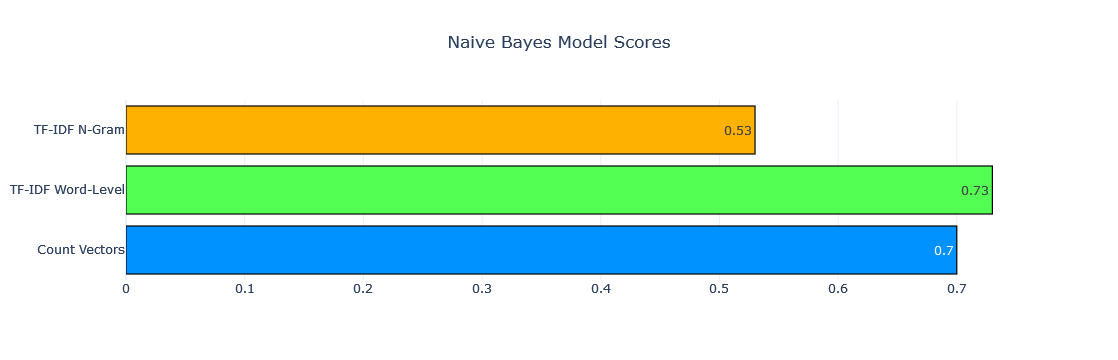

CPU times: total: 46.9 ms
Wall time: 84.4 ms


In [79]:
%%time
def score(method_list):
    scores = []
    for method in method_list:
        NB_classifier = MultinomialNB()
        NB_model = MultinomialNB().fit(X_count, y)
        scores.append(cross_val_score(NB_model, method, y, cv=5, n_jobs=-1).mean())
        
    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})
    
    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#0092FF','#54FF54','#FFB100'],
                                 line=dict(color='rgb(0,0,0)',width=1.2)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group", 
                       title={'text': "Naive Bayes Model Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)
    
method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

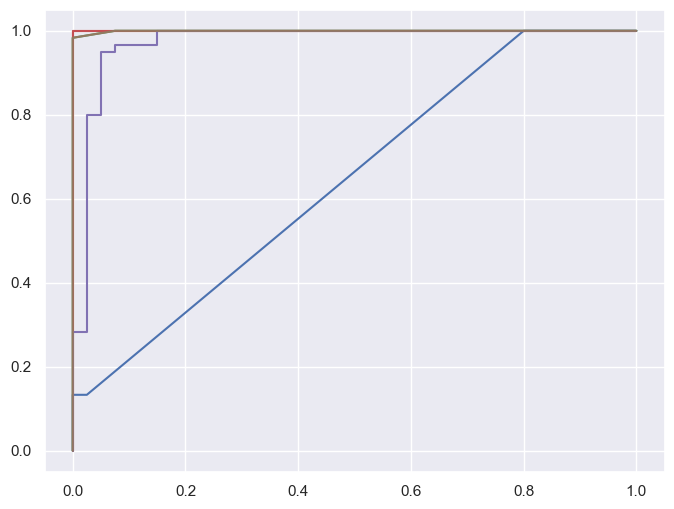

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, label):
    # Getting predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X)[:, 1]

    # Calculating false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

    # Calculating the area under the ROC curve
    roc_auc = roc_auc_score(y, y_pred_prob)

    # Plotting the ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (label, roc_auc))

# Assuming you have already trained your random forest model 'rf_model'
# and logistic regression model 'log_model'
# and have feature matrices 'X_tf_idf_word', 'X_count', 'X_tf_idf_ngram', and target variable 'y'

# Plotting ROC curves for X_tf_idf_word, X_count, X_tf_idf_ngram, and X_tf_idf_word (logistic regression) on the same graph
plt.figure(figsize=(8, 6))

# Plotting ROC curve for X_tf_idf_word (random forest)
plot_roc_curve(rf_model1, X_tf_idf_word, y, 'RF: TF-IDF Word')
# Plotting ROC curve for X_count (random forest)
plot_roc_curve(rf_model2, X_count, y, 'RF: Count')
# Plotting ROC curve for X_tf_idf_ngram (random forest)
plot_roc_curve(rf_model3, X_tf_idf_ngram, y, 'RF: TF-IDF Ngram')

# Plotting ROC curve for X_tf_idf_word (logistic regression)
plot_roc_curve(log_model_1, X_tf_idf_word, y, 'Logistic: TF-IDF Word')
# Plotting ROC curve for X_Count (logistic regression)
plot_roc_curve(log_model_2, X_count, y, 'Logistic: Count Vector')
# Plotting ROC curve for X_Count (logistic regression)
plot_roc_curve(log_model_3, X_tf_idf_ngram, y, 'Logistic: TF-IDF Ngram')


# Plotting ROC curve for X_tf_idf_word (Naive bayes nodels )
plot_roc_curve(NB_model1, X_tf_idf_word, y, 'Naive bayes : TF-IDF Word')
# Plotting ROC curve for X_tf_idf_word (Naive bayes nodels )
plot_roc_curve(NB_model2, X_count, y, 'Naive bayes : Count Vectors')
# Plotting ROC curve for X_tf_idf_word (Naive bayes nodels )
plot_roc_curve(NB_classifier, X_tf_idf_ngram, y, 'Naive bayes : TF-IDF Ngram')

# Plotting ROC curve for X_tf_idf_word (Naive bayes nodels )
#plot_roc_curve(model, X_test, y, 'RNN : Count')

# Plotting the random classifier line
plt.plot([0, 1], [0, 1], 'k--')

# Setting the plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [74]:
# Hyperparameter Optimization
rf_model = RandomForestClassifier(random_state=17)  # create an empty model object

In [75]:
%%time
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]
             }

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 141 ms
Wall time: 3.14 s


In [76]:
# best parameters that GridSearchCV found
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 8,
 'n_estimators': 200}

In [77]:
# set the model with the parameters GridSearchCV found above
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=51).fit(X_count, y)

# our final score
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.82